In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
print(df.head())
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [ ]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df = df.dropna()

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[67 13]
 [29 34]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        80
           1       0.72      0.54      0.62        63

    accuracy                           0.71       143
   macro avg       0.71      0.69      0.69       143
weighted avg       0.71      0.71      0.70       143



In [ ]:
print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 2))


Accuracy Score: 0.71


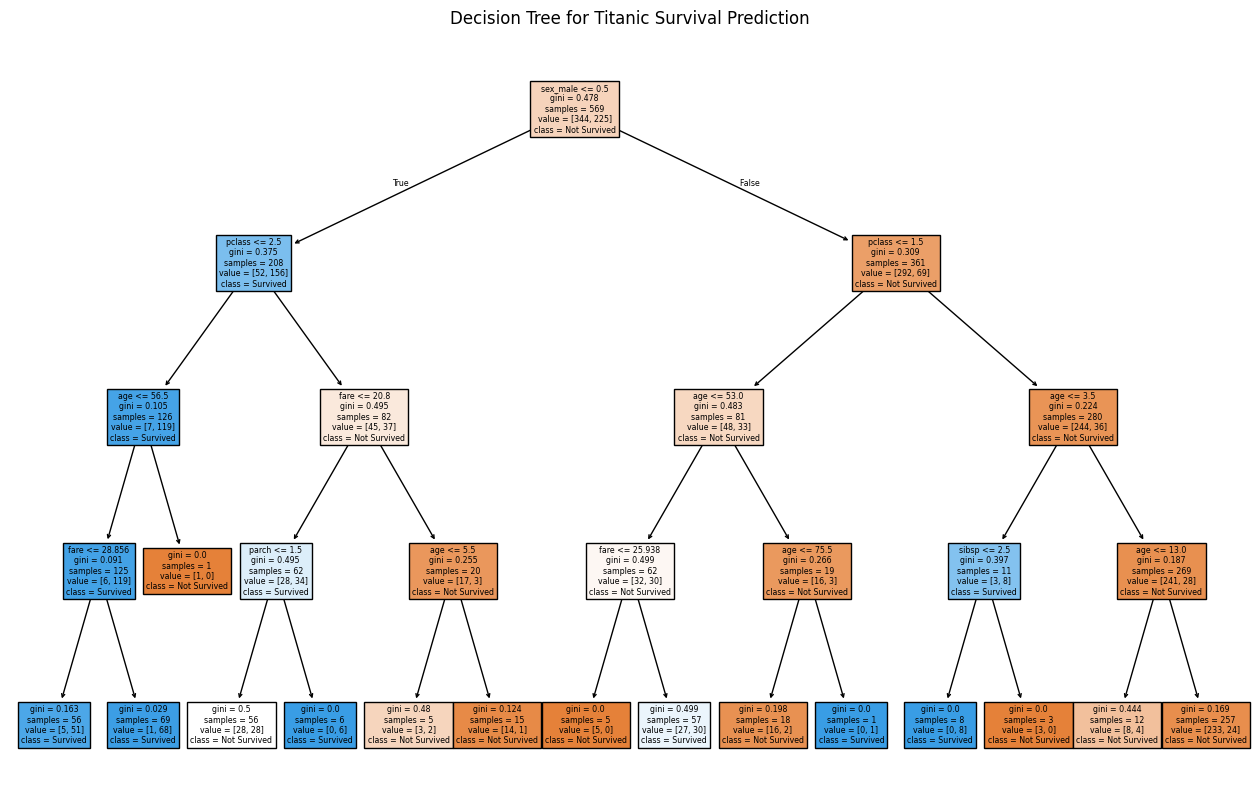

In [ ]:
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()